# Guided Project: Star Wars Survey

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

* The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).
<br>
* For this project, you'll be cleaning and exploring the data set in Jupyter notebook. To see a sample notebook containing all of the answers, visit [the project's GitHub repository](https://github.com/dataquestio/solutions/blob/master/Mission201Solution.ipynb).



You can read more about **character encodings** on developer [Joel Spolsky's blog](http://www.joelonsoftware.com/articles/Unicode.html).

In [128]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Major features
Feature|Meaning
:---:|:---:
RespondentID|An anonymized ID for the respondent (person taking the survey)
Gender|The respondent's gender
Age|The respondent's age
Household Income|The respondent's income
Education|The respondent's education level
Location (Census Region)|The respondent's location
Have you seen any of the 6 films in the Star Wars franchise?|Has a Yes or No response
Do you consider yourself to be a fan of the Star Wars film franchise?|Has a Yes or No response

In [34]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [35]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [36]:
# count nan in RespondentID
star_wars.RespondentID.isnull().sum()

1

In [37]:
# filter rows that not-null RespondentID

star_wars = star_wars[star_wars.RespondentID.notnull()]

* Convert the 'Have you seen any of the 6 films in the Star Wars franchise?' column to the Boolean type.
* Convert the Do you consider yourself to be a fan of the Star Wars film franchise? column to the Boolean type.
* When you're finished, both columns should only contain the values True, False, and NaN.

In [38]:
def print_uniques_and_num_nulls(colname):
    print('unique values :', star_wars[colname].unique())
    print('num of nulls :', star_wars[colname].isnull().sum())

In [39]:
print_uniques_and_num_nulls('Have you seen any of the 6 films in the Star Wars franchise?')


unique values : ['Yes' 'No']
num of nulls : 0


In [40]:
print_uniques_and_num_nulls('Do you consider yourself to be a fan of the Star Wars film franchise?')


unique values : ['Yes' nan 'No']
num of nulls : 350


In [41]:
def binarize(value):
    if value == 'Yes': return 1;
    elif value == 'No': return 0;

In [42]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=\
            star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].\
            apply(binarize)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=\
            star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].\
            apply(binarize)

* 'Which of the following Star Wars films have you seen? Please select all that apply.' - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

#### binarize - 'Which of the following Star Wars films have you seen? Please select all that apply.'

In [43]:
print_uniques_and_num_nulls('Which of the following Star Wars films have you seen? Please select all that apply.')

unique values : ['Star Wars: Episode I  The Phantom Menace' nan]
num of nulls : 513


In [49]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] =\
            star_wars['Which of the following Star Wars films have you seen? Please select all that apply.']\
            .map({
                'Star Wars: Episode I  The Phantom Menace': True,
                np.nan: False
            })

In [50]:
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1'
})

#### binarize - 'Unnamed: 4'

In [14]:
print_uniques_and_num_nulls('Unnamed: 4')

unique values : ['Star Wars: Episode II  Attack of the Clones' nan]
num of nulls : 615


In [51]:
star_wars['Unnamed: 4'] =\
            star_wars['Unnamed: 4']\
            .map({
                'Star Wars: Episode II  Attack of the Clones': True,
                np.nan: False
            })

In [52]:
star_wars.rename(columns={'Unnamed: 4':'seen_2'}, inplace=True)

#### binarize - 'Unnamed: 5'

In [17]:
print_uniques_and_num_nulls('Unnamed: 5')

unique values : ['Star Wars: Episode III  Revenge of the Sith' nan]
num of nulls : 636


In [53]:
star_wars['Unnamed: 5'] =\
            star_wars['Unnamed: 5']\
            .map({
                'Star Wars: Episode III  Revenge of the Sith': True,
                np.nan: False
            })

In [54]:
star_wars.rename(columns={'Unnamed: 5':'seen_3'}, inplace=True)

#### binarize - 'Unnamed: 6'

In [20]:
print_uniques_and_num_nulls('Unnamed: 6')

unique values : ['Star Wars: Episode IV  A New Hope' nan]
num of nulls : 579


In [55]:
star_wars['Unnamed: 6'] =\
            star_wars['Unnamed: 6']\
            .map({
                'Star Wars: Episode IV  A New Hope': True,
                np.nan: False
            })
            

In [56]:
star_wars.rename(columns={'Unnamed: 6':'seen_4'}, inplace=True)

#### binarize - 'Unnamed: 7'

In [23]:
print_uniques_and_num_nulls('Unnamed: 7')

unique values : ['Star Wars: Episode V The Empire Strikes Back' nan]
num of nulls : 428


In [57]:
star_wars['Unnamed: 7'] =\
            star_wars['Unnamed: 7']\
            .map({
                'Star Wars: Episode V The Empire Strikes Back': True,
                np.nan: False
            })

In [58]:
star_wars.rename(columns={'Unnamed: 7':'seen_5'}, inplace=True)

#### binarize - 'Unnamed: 8'

In [66]:
print_uniques_and_num_nulls('Unnamed: 8')

unique values : ['Star Wars: Episode VI Return of the Jedi' nan]
num of nulls : 448


In [67]:
star_wars['Unnamed: 8'] =\
            star_wars['Unnamed: 8']\
            .map({
                'Star Wars: Episode VI Return of the Jedi': True,
                np.nan: False
            })

In [68]:
star_wars.rename(columns={'Unnamed: 8':'seen_6'}, inplace=True)

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
* Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
* Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
* Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

```python
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
```

In [59]:
transform_to_float = ['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',\
                      'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']

star_wars[transform_to_float] = star_wars[transform_to_float].astype(float)

In [60]:
star_wars = star_wars.rename(columns =
                             {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rank_1',
                             'Unnamed: 10':'rank_2',
                             'Unnamed: 11':'rank_3',
                             'Unnamed: 12':'rank_4',
                             'Unnamed: 13':'rank_5',
                             'Unnamed: 14':'rank_6'})

In [61]:
star_wars[['rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5','rank_6']].head()

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


Use the pandas.DataFrame.mean() method to compute the mean of each of the ranking columns from the last screen.<br><br>
Make a bar chart of each ranking. You can use a matplotlib bar chart for this.
* Make sure to run %matplotlib inline beforehand to show your plots in the notebook.

Write up a summary of what you've done so far in a Markdown cell. Also discuss why you think the respondents ranked the movies the way they did.
Remember that a lower ranking is better!

In [62]:
%matplotlib inline

### Summary - series ranking by point
The first 3 episodes of Star Wars = Top 3 Ranking

* Ranking 1 : Star Wars: Episode III Revenge of the Sith
* Ranking 2 : Star Wars: Episode II Attack of the Clones
* Ranking 3 : Star Wars: Episode I The Phantom Menace
* Ranking 4 : Star Wars: Episode IV A New Hope
* Ranking 5 : Star Wars: Episode VI Return of the Jedi
* Ranking 6 : Star Wars: Episode V The Empire Strikes Back

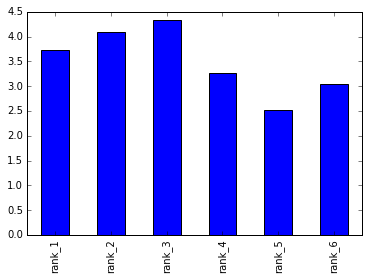

In [63]:
star_wars[['rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5','rank_6']].mean().plot(kind='bar')

Use the df.sum() method to compute the sum of each of the seen columns.<br><br>
Make a bar chart of each ranking. You can use a matplotlib bar chart for this.<br><br>
Write up your thoughts on why the results look the way they do in a Markdown cell. Also discuss how the results correlate with the rankings.

In [69]:
star_wars[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

### Summary - series ranking by views
ranking by views seems to have - correlation with ranking by point.

* Ranking 1 : Star Wars: Episode V The Empire Strikes Back
* Ranking 2 : Star Wars: Episode VI Return of the Jedi
* Ranking 3 : Star Wars: Episode I The Phantom Menace
* Ranking 4 : Star Wars: Episode IV A New Hope
* Ranking 5 : Star Wars: Episode II Attack of the Clones
* Ranking 6 : Star Wars: Episode III Attack of the Clones

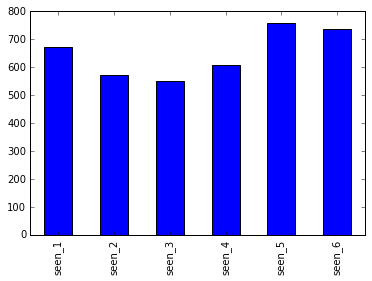

In [70]:
star_wars[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']].sum().plot(kind='bar')

* Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
* Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
* Gender - Male or Female

Split the data into two groups based on one of the binary columns above.<br><br>
Redo the two previous analyses (find the most viewed movie and the highest-ranked movie) separately for each group, and then compare the results.<br><br>
If you see any interesting patterns, write about them in a Markdown cell.

In [89]:
star_wars[['rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6']] /= 2

In [96]:
star_wars_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]
star_wars_notfan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]

star_trek_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='Yes']
star_trek_notfan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='No']

males = star_wars[star_wars['Gender']=='Male']
females = star_wars[star_wars['Gender']=='Female']

### Star Wars fans vs. not fans
Star wars fans
* Star Wars fans tend to rate more for the early series than recent ones
* Seen ratio is very high (over 80% for the entire series)

Star wars no fans
* No fans tend to rate mid series (3,4) higher than others
* Seen ratio is relatively low

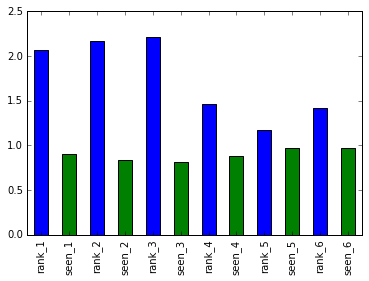

In [105]:
star_wars_fan[['rank_1', 'seen_1', 'rank_2', 'seen_2',
               'rank_3', 'seen_3', 'rank_4', 'seen_4',
               'rank_5', 'seen_5', 'rank_6', 'seen_6']]\
                .mean().plot(kind='bar', color=['b', 'g'])

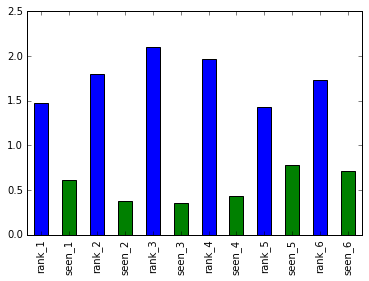

In [106]:
star_wars_notfan[['rank_1', 'seen_1', 'rank_2', 'seen_2',
               'rank_3', 'seen_3', 'rank_4', 'seen_4',
               'rank_5', 'seen_5', 'rank_6', 'seen_6']]\
                .mean().plot(kind='bar', color=['b', 'g'])

### Star Trek fans vs. not fans
Star Trek fans
* Star Trek fans seem to be simliar to Star Wars fans in terms of nostalgia for earlies and seen ratio.

Star Trek no fans
* Unlikely with Star Wars no fans, Star Trek no fans seem to rate the early Star Wars series higher than the early ones.

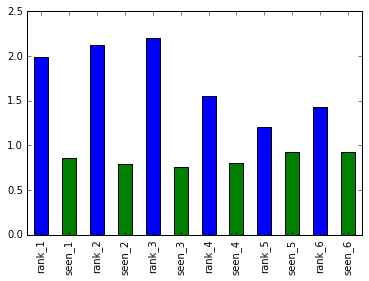

In [107]:
star_trek_fan[['rank_1', 'seen_1', 'rank_2', 'seen_2',
               'rank_3', 'seen_3', 'rank_4', 'seen_4',
               'rank_5', 'seen_5', 'rank_6', 'seen_6']]\
                .mean().plot(kind='bar', color=['b', 'g'])

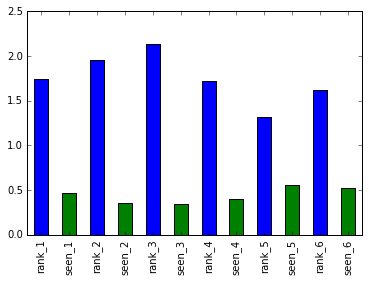

In [108]:
star_trek_notfan[['rank_1', 'seen_1', 'rank_2', 'seen_2',
               'rank_3', 'seen_3', 'rank_4', 'seen_4',
               'rank_5', 'seen_5', 'rank_6', 'seen_6']]\
                .mean().plot(kind='bar',color=['b', 'g'])

### Men vs. Women
Common
* Rate the early series higher than the recent ones
* Rate Series IV the worst

Diff
* Men have higher seen ratio than women

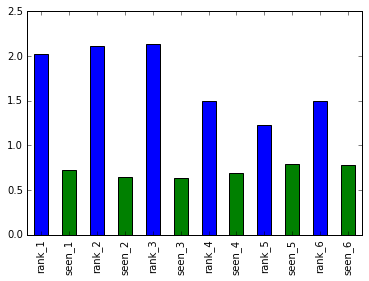

In [109]:
males[['rank_1', 'seen_1', 'rank_2', 'seen_2',
               'rank_3', 'seen_3', 'rank_4', 'seen_4',
               'rank_5', 'seen_5', 'rank_6', 'seen_6']]\
                .mean().plot(kind='bar', color=['b', 'g'])

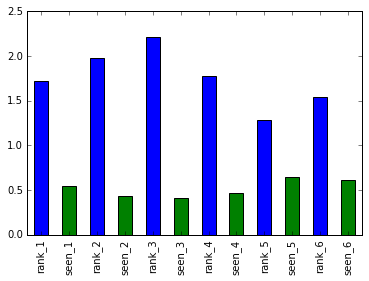

In [110]:
females[['rank_1', 'seen_1', 'rank_2', 'seen_2',
               'rank_3', 'seen_3', 'rank_4', 'seen_4',
               'rank_5', 'seen_5', 'rank_6', 'seen_6']]\
                .mean().plot(kind='bar', color=['b', 'g'])

## Here are some potential next steps:

* Try to segment the data based on columns like `Education`, `Location (Census Region)`, and `Which character shot first?`, which aren't binary. Are they any interesting patterns?
* Clean up columns `15` to `29`, which contain data on the characters respondents view favorably and unfavorably.
  * Which character do respondents like the most?
  * Which character do respondents dislike the most?
  * Which character is the most controversial (split between likes and dislikes)?

### Segment by education / location / etc.

In [112]:
star_wars.Education.unique()

array(['High school degree', 'Bachelor degree',
       'Some college or Associate degree', nan, 'Graduate degree',
       'Less than high school degree'], dtype=object)

In [118]:
star_wars['Education_int'] = star_wars.Education.map({
                                np.nan:0,
                                'Less than high school degree':1,
                                'High school degree':2,
                                'Some college or Associate degree':3,
                                'Bachelor degree':4,
                                'Graduate degree':5
                            })

In [119]:
lt_highschool = star_wars[star_wars.Education_int==1]
highschool = star_wars[star_wars.Education_int==2]
associate = star_wars[star_wars.Education_int==3]
bachelor = star_wars[star_wars.Education_int==4]
graduate = star_wars[star_wars.Education_int==5]

** Mean 'Like' scores for the entire series have no difference by education.**

In [121]:
print(lt_highschool[['rank_1','rank_2','rank_3','rank_4','rank_5','rank_6']].mean().mean())
print(highschool[['rank_1','rank_2','rank_3','rank_4','rank_5','rank_6']].mean().mean())
print(associate[['rank_1','rank_2','rank_3','rank_4','rank_5','rank_6']].mean().mean())
print(bachelor[['rank_1','rank_2','rank_3','rank_4','rank_5','rank_6']].mean().mean())
print(graduate[['rank_1','rank_2','rank_3','rank_4','rank_5','rank_6']].mean().mean())

1.75
1.75
1.75
1.74952960331
1.7491969846


** Mean viewers for the entire series have strong +correlation with education.**

In [122]:
print(lt_highschool[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].mean().mean())
print(highschool[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].mean().mean())
print(associate[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].mean().mean())
print(bachelor[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].mean().mean())
print(graduate[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].mean().mean())

0.428571428571
0.519047619048
0.614837398374
0.628764278297
0.629090909091


### Segment by education

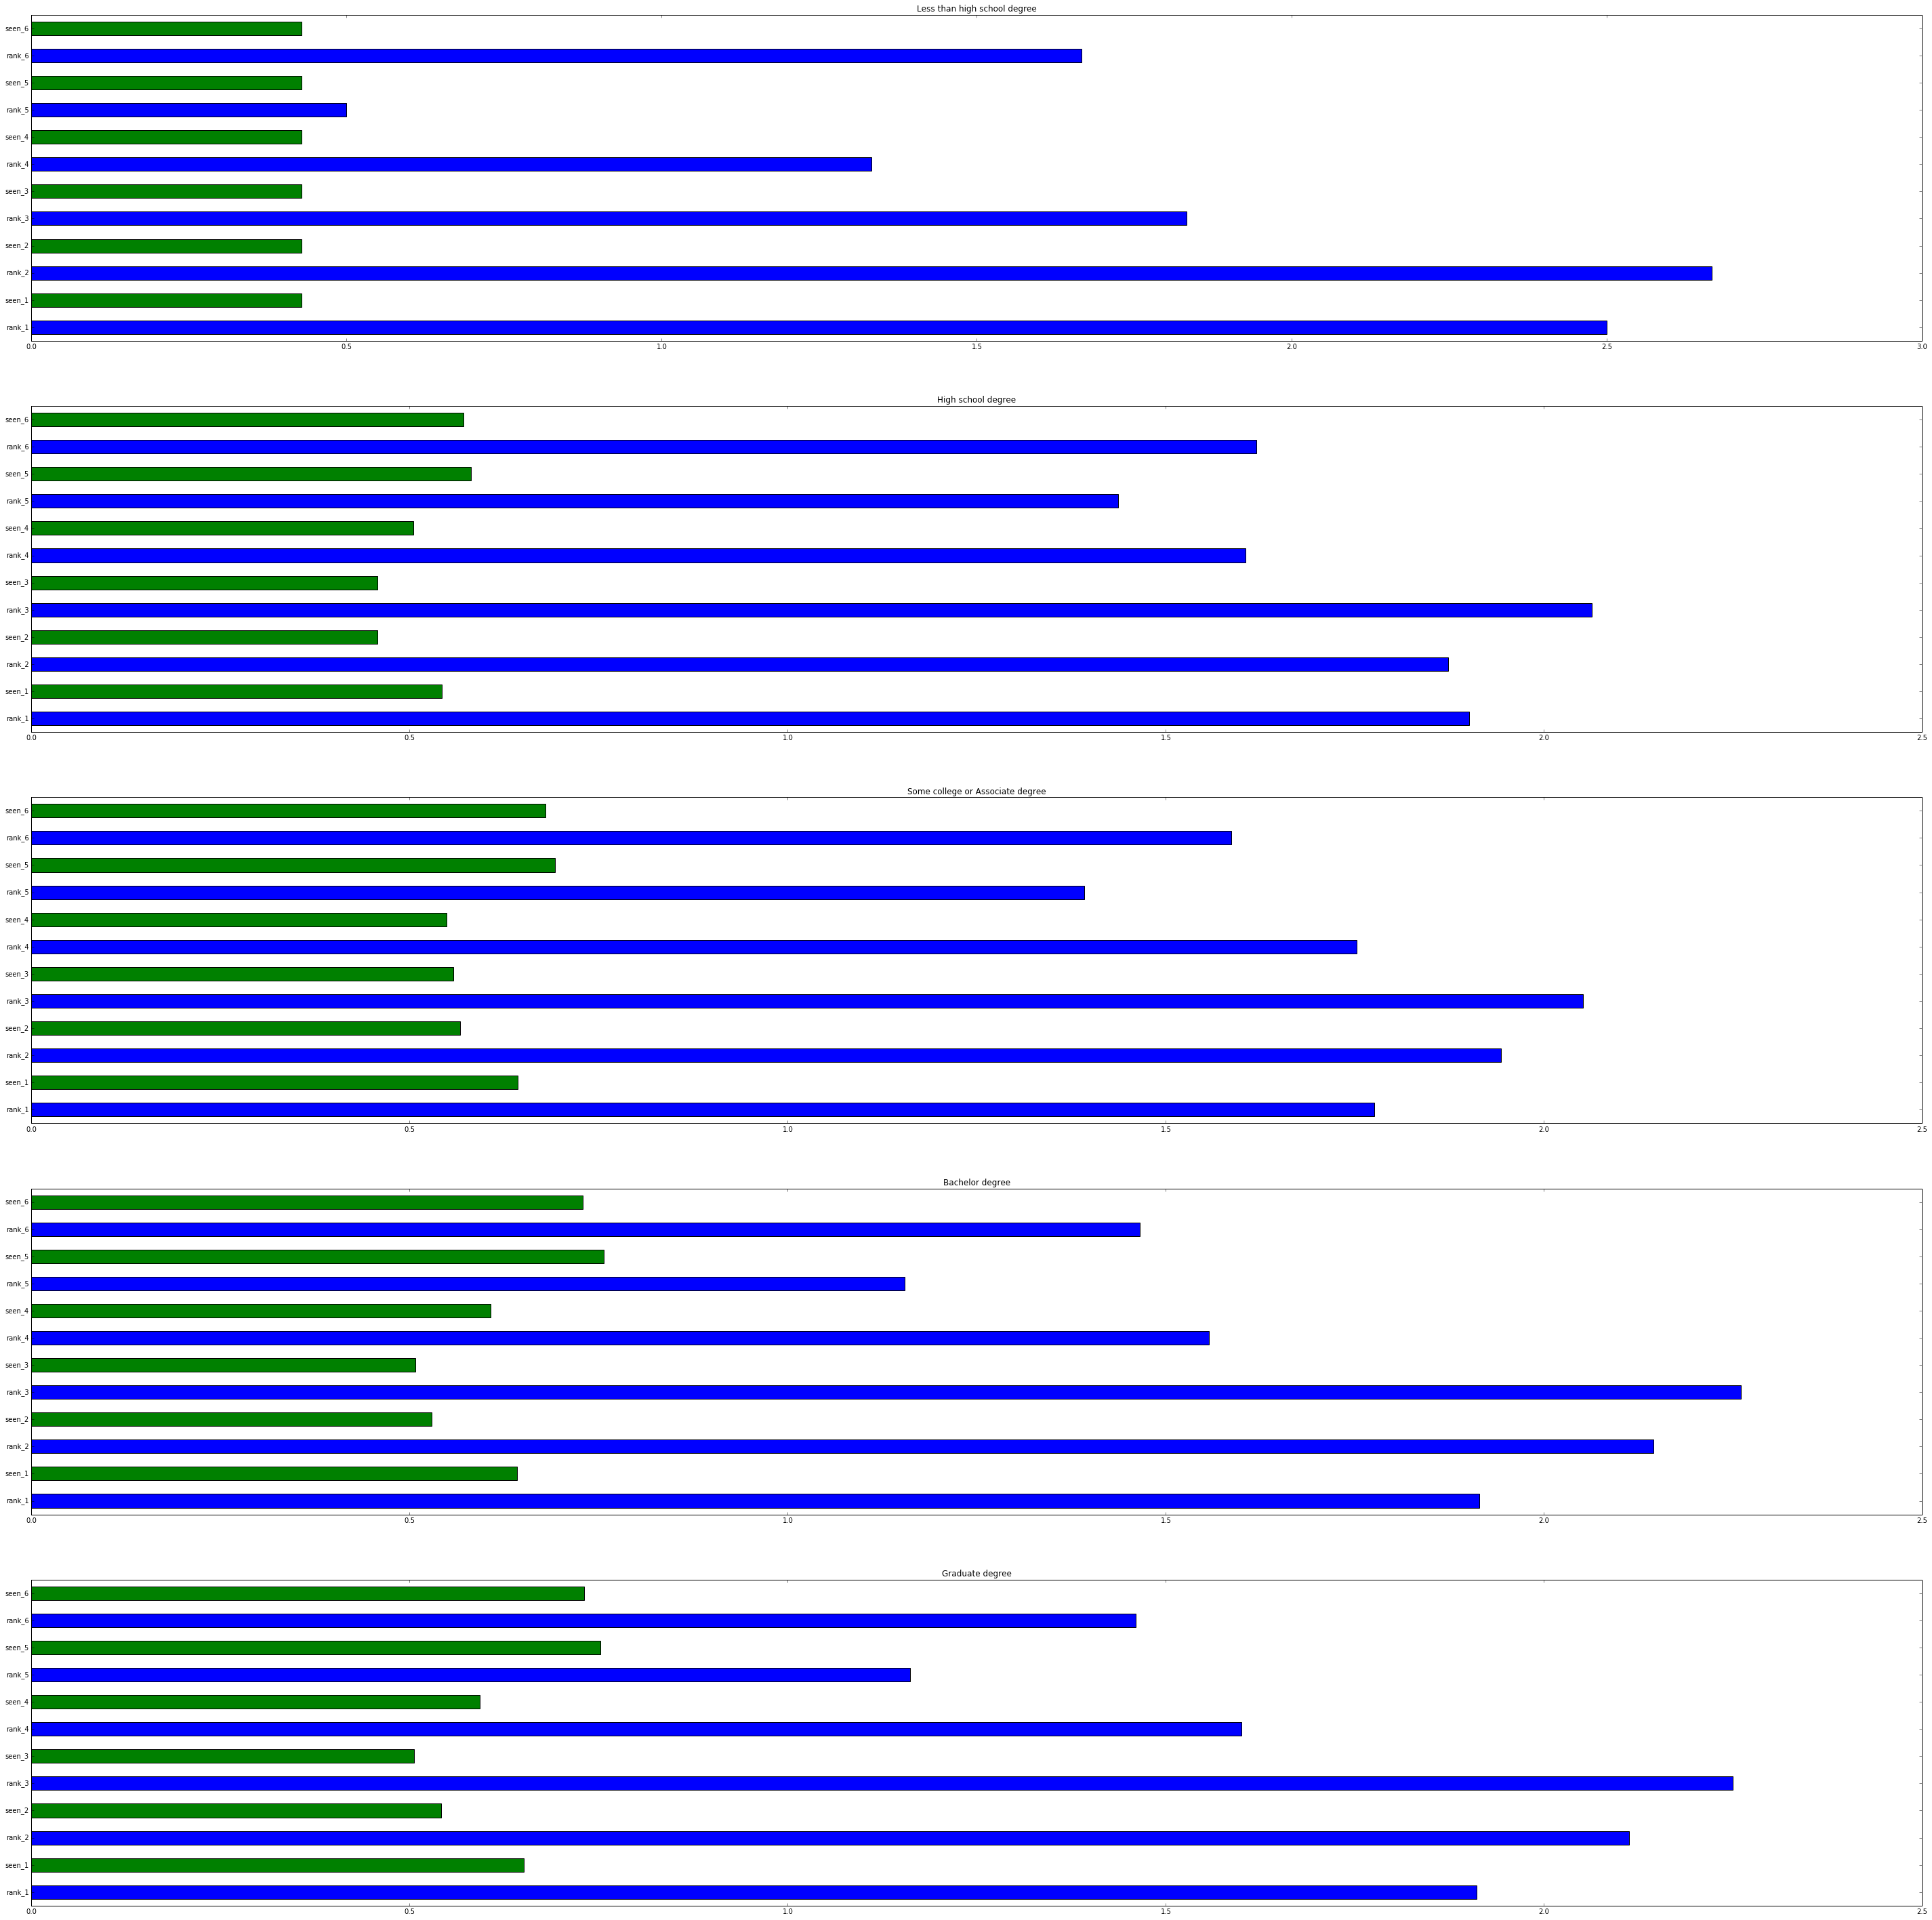

In [152]:
plt.figure(figsize=(50,50))
degree_title = ['Less than high school degree', 'High school degree', 
                'Some college or Associate degree', 'Bachelor degree', 
                'Graduate degree']

for i, degree_df in enumerate([lt_highschool, highschool, associate, bachelor, graduate]):
    
    plt.subplot(5,1,i+1)
    degree_df[['rank_1', 'seen_1', 'rank_2', 'seen_2',
                   'rank_3', 'seen_3', 'rank_4', 'seen_4',
                   'rank_5', 'seen_5', 'rank_6', 'seen_6']]\
                    .mean().plot(kind='barh', color=['b', 'g'],\
                    subplots=True)
    plt.title(degree_title[i])

In [153]:
def get_total(df_list, col_list):
    
    total = 0
    for df in df_list:
        for col in col_list:
            total += df[col].sum()
        
    return total    

In [154]:
edu_seg = [lt_highschool, highschool, associate, bachelor, graduate]

In [159]:
seen1_total = get_total(edu_seg, ['seen_1'])
seen1_above_associate = get_total(edu_seg[2:], ['seen_1'])
                
seen1_above_associate/seen1_total

0.90853658536585369

In [174]:
for i in range(1, 7):
    
    print('series '+str(i)+' : viewers rate (above Bachelor edu): ', end='')
    seen_above_associate = get_total(edu_seg[3:], ['seen_'+str(i)])
    seen_total_edu = get_total(edu_seg, ['seen_'+str(i)])
    print(seen_above_associate/seen_total_edu)
    

series 1 : viewers rate (above Bachelor edu): 0.586890243902
series 2 : viewers rate (above Bachelor edu): 0.573741007194
series 3 : viewers rate (above Bachelor edu): 0.563432835821
series 4 : viewers rate (above Bachelor edu): 0.602693602694
series 5 : viewers rate (above Bachelor edu): 0.607287449393
series 6 : viewers rate (above Bachelor edu): 0.603328710125


In [173]:
for i in range(1, 7):
    
    print('series '+str(i)+' : viewers rate (less than Bachelor edu): ', end='')
    seen_above_associate = get_total(edu_seg[:3], ['seen_'+str(i)])
    seen_total_edu = get_total(edu_seg, ['seen_'+str(i)])
    print(seen_above_associate/seen_total_edu)
    

series 1 : viewers rate (less than Bachelor edu): 0.413109756098
series 2 : viewers rate (less than Bachelor edu): 0.426258992806
series 3 : viewers rate (less than Bachelor edu): 0.436567164179
series 4 : viewers rate (less than Bachelor edu): 0.397306397306
series 5 : viewers rate (less than Bachelor edu): 0.392712550607
series 6 : viewers rate (less than Bachelor edu): 0.396671289875


In [ ]:
# series 5+6 mean score by education

In [169]:
for title, edu in zip(degree_title, edu_seg):
    
    print(title+' (rank5+rank_6):', end=' ')
    rank_5_score = edu['rank_5'].mean()
    rank_6_score = edu['rank_6'].mean()
    print(rank_5_score + rank_6_score)
    

Less than high school degree (rank5+rank_6): 2.16666666667
High school degree (rank5+rank_6): 3.05633802817
Some college or Associate degree (rank5+rank_6): 2.97834645669
Bachelor degree (rank5+rank_6): 2.62022900763
Graduate degree (rank5+rank_6): 2.62168141593


In [ ]:
# series 1+2+3 mean score by education

In [170]:
for title, edu in zip(degree_title, edu_seg):
    
    print(title+' (rank_1+2+3): ', end='')
    rank_1_score = edu['rank_1'].mean()
    rank_2_score = edu['rank_2'].mean()
    rank_3_score = edu['rank_3'].mean()
    print(rank_1_score+rank_2_score+rank_3_score)
    

Less than high school degree (rank_1+2+3): 7.0
High school degree (rank_1+2+3): 5.83802816901
Some college or Associate degree (rank_1+2+3): 5.76968503937
Bachelor degree (rank_1+2+3): 6.31969670381
Graduate degree (rank_1+2+3): 6.27394296952


### Segment by Location

In [162]:
star_wars['Location (Census Region)'].unique()

array(['South Atlantic', 'West South Central', 'West North Central',
       'Middle Atlantic', 'East North Central', 'Pacific', nan, 'Mountain',
       'New England', 'East South Central'], dtype=object)

In [163]:
s_atl = star_wars[star_wars['Location (Census Region)']=='South Atlantic']
w_s_cen = star_wars[star_wars['Location (Census Region)']=='West South Central']
w_n_cen = star_wars[star_wars['Location (Census Region)']=='West North Central']
m_atl = star_wars[star_wars['Location (Census Region)']=='Middle Atlantic']
e_n_cen = star_wars[star_wars['Location (Census Region)']=='East North Central']
pac = star_wars[star_wars['Location (Census Region)']=='Pacific']
mount = star_wars[star_wars['Location (Census Region)']=='Mountain']
n_eng = star_wars[star_wars['Location (Census Region)']=='New England']
e_s_cen = star_wars[star_wars['Location (Census Region)']=='East South Central']


In [164]:
loc_seg = [s_atl, w_s_cen, w_n_cen, m_atl, e_n_cen, pac, mount, n_eng, e_s_cen]

In [180]:
loc_names = ['South Atlantic', 'West South Central', 'West North Central',
       'Middle Atlantic', 'East North Central', 'Pacific', 'Mountain',
       'New England', 'East South Central']

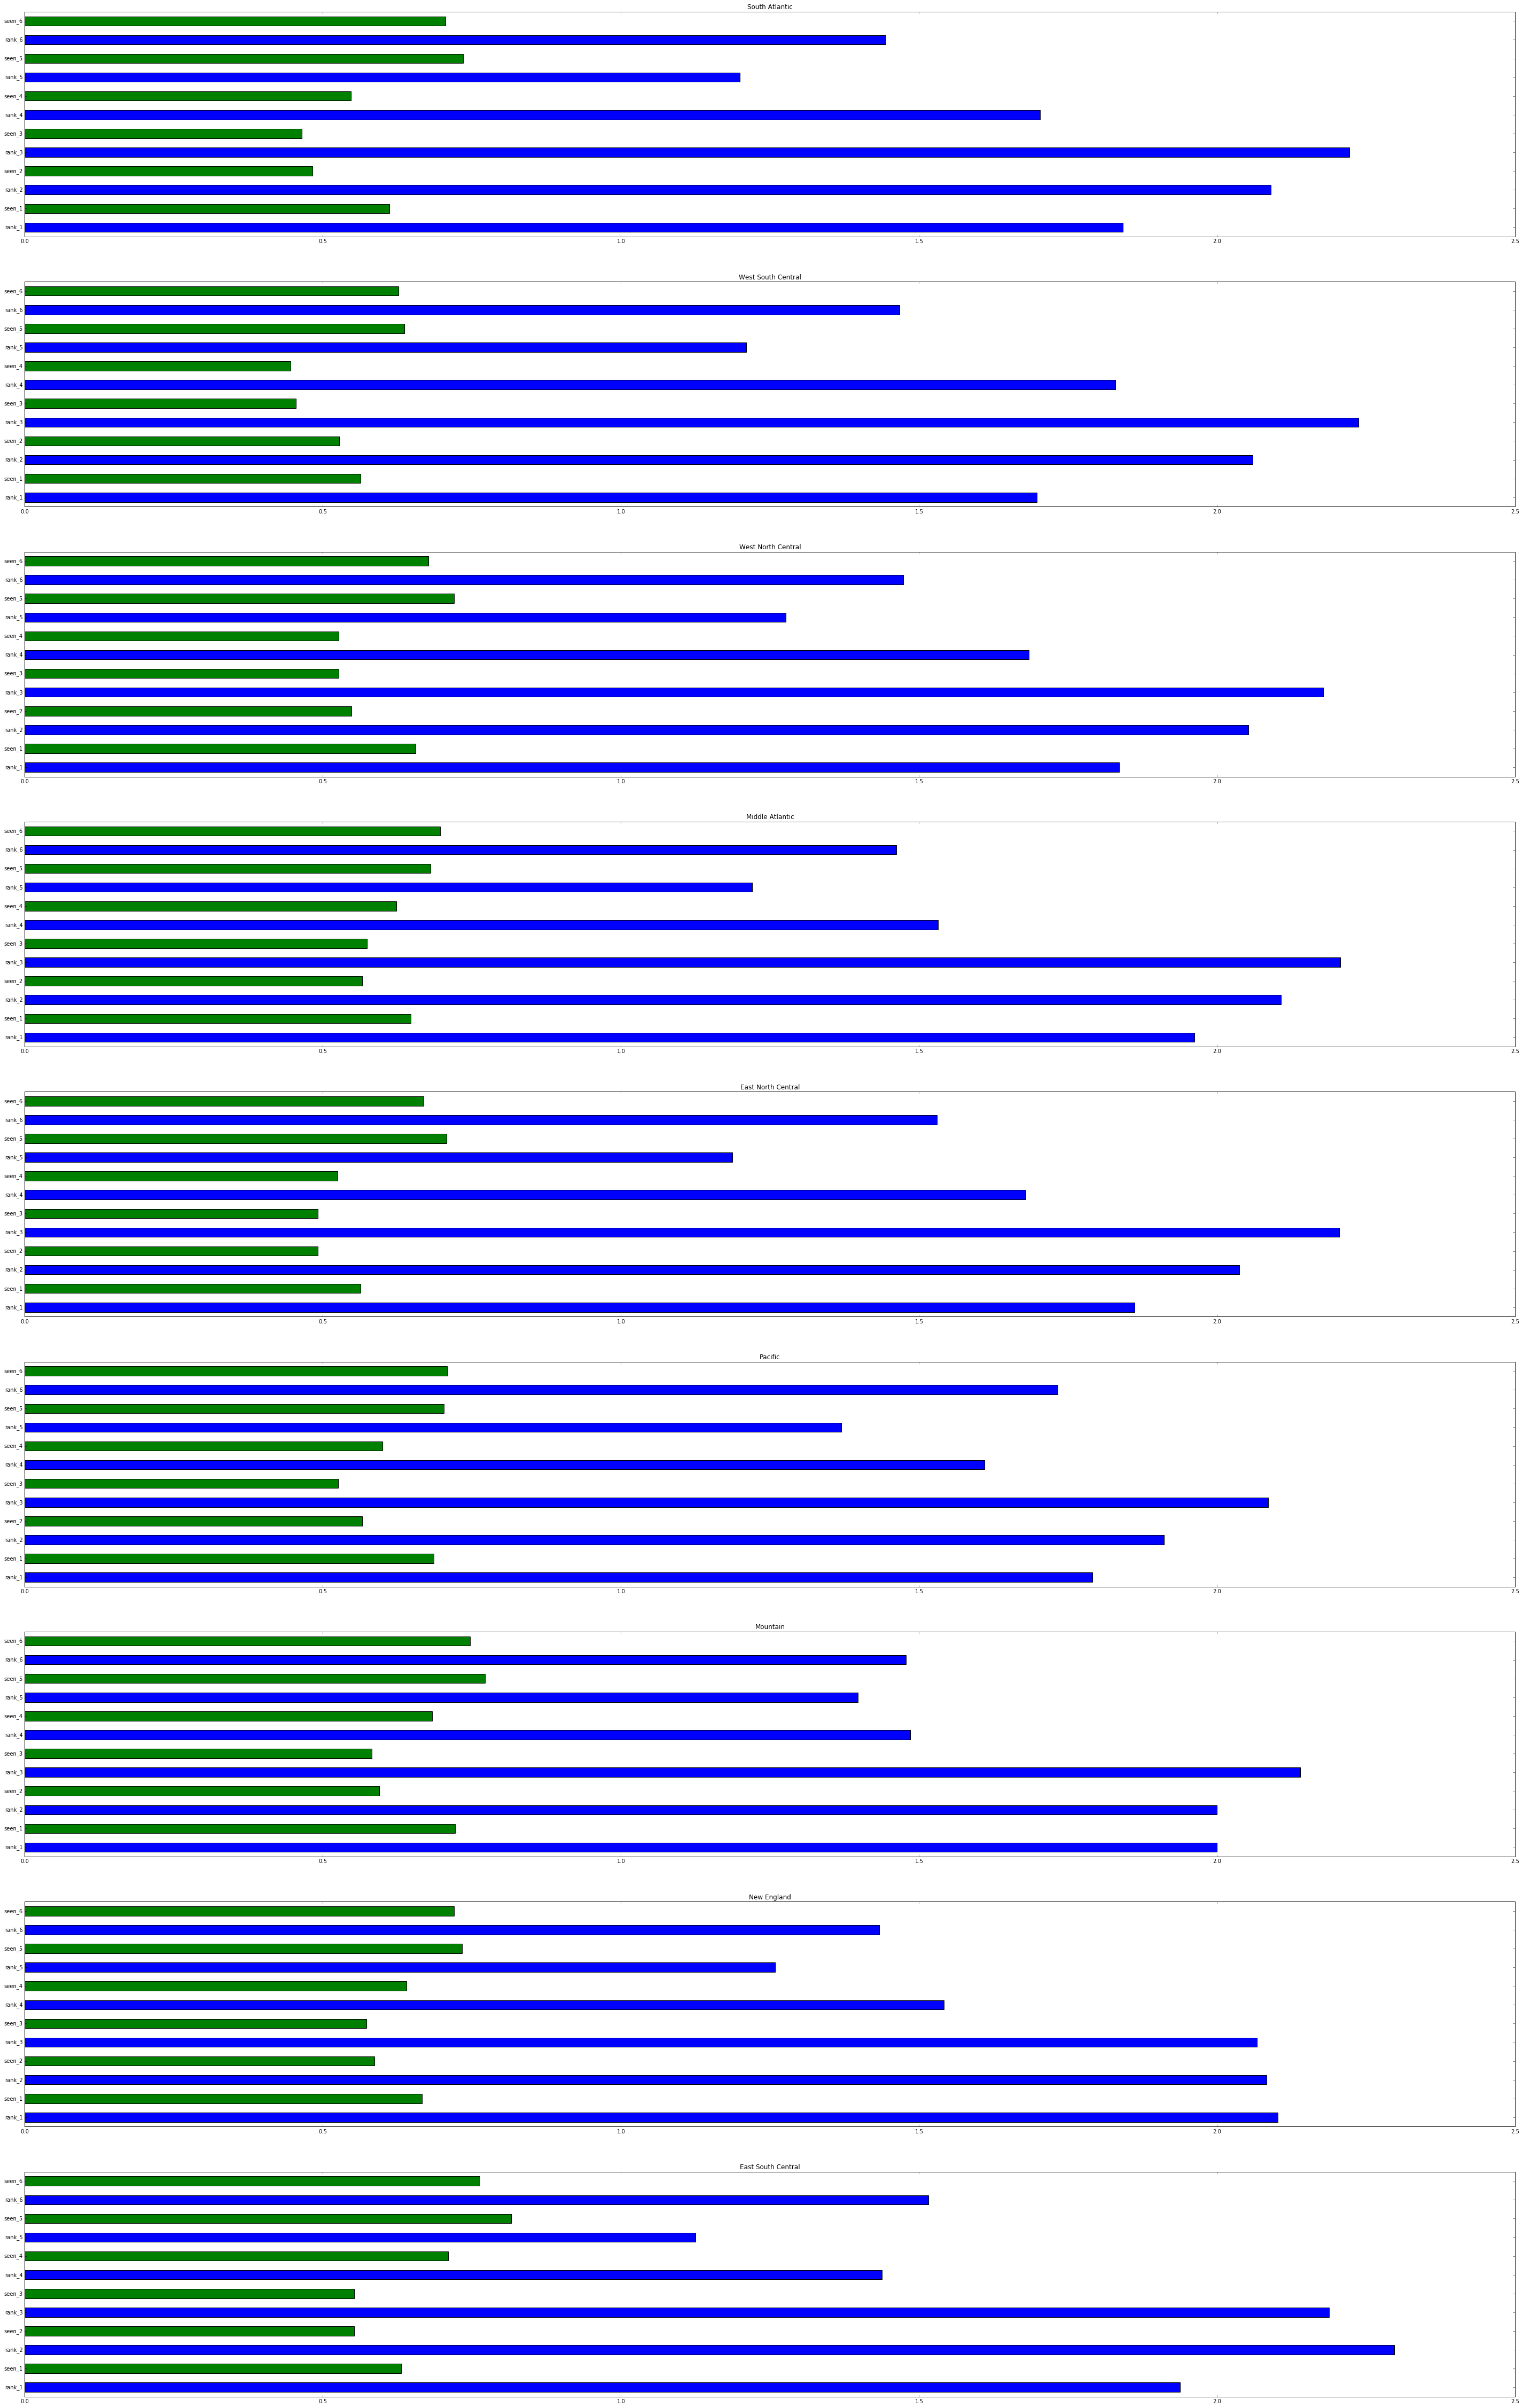

In [182]:
plt.figure(figsize=(50,80))

for i, loc_df in enumerate(loc_seg):
    
    plt.subplot(9,1,i+1)
    loc_df[['rank_1', 'seen_1', 'rank_2', 'seen_2',
                   'rank_3', 'seen_3', 'rank_4', 'seen_4',
                   'rank_5', 'seen_5', 'rank_6', 'seen_6']]\
                    .mean().plot(kind='barh', color=['b', 'g'],\
                    subplots=True)
    plt.title(loc_names[i])

### Clean up columns 15 to 29 and find some interesting points.

In [216]:
{col:'char_'+str(i) for col, i in zip(star_wars.columns[15:29], range(len(star_wars.columns)))}


{'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'char_0',
 'Unnamed: 16': 'char_1',
 'Unnamed: 17': 'char_2',
 'Unnamed: 18': 'char_3',
 'Unnamed: 19': 'char_4',
 'Unnamed: 20': 'char_5',
 'Unnamed: 21': 'char_6',
 'Unnamed: 22': 'char_7',
 'Unnamed: 23': 'char_8',
 'Unnamed: 24': 'char_9',
 'Unnamed: 25': 'char_10',
 'Unnamed: 26': 'char_11',
 'Unnamed: 27': 'char_12',
 'Unnamed: 28': 'char_13'}

In [185]:
star_wars['Unnamed: 16'].unique()

array(['Very favorably', nan, 'Somewhat favorably', 'Somewhat unfavorably',
       'Neither favorably nor unfavorably (neutral)', 'Very unfavorably',
       'Unfamiliar (N/A)'], dtype=object)

In [221]:
mapped_survey_chars = star_wars.iloc[:,15:29].replace({
                    'Very favorably':2,
                    'Somewhat favorably':1,
                    'Neither favorably nor unfavorably (neutral)':0,
                    'Somewhat unfavorably':-1,
                    'Very unfavorably':-2,
                    'Unfamiliar (N/A)':0,
                    np.nan:0
                }).rename(columns=
                {col:'char_'+str(i+1) for col, i \
                 in zip(star_wars.columns[15:29], range(len(star_wars.columns)))}
            )

### respondents like the most = First one
### respondents dislike the most = Unnamed: 26
### most controversial = Unnamed: 20

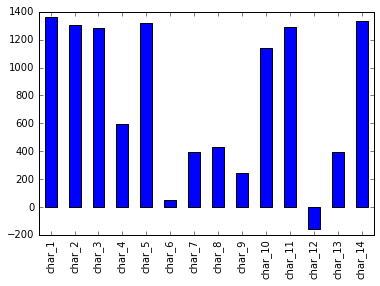

In [222]:
mapped_survey_chars.sum().plot(kind='bar')

In [223]:
star_wars.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186],
           dtype='int64', length=1186)

In [224]:
mapped_survey_chars.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186],
           dtype='int64', length=1186)

In [225]:
for gradx in graduate.index:
    print(gradx)
    if gradx not in mapped_survey_chars.index:
        print('this guy!\n####')

14
35
36
41
42
50
58
62
68
70
71
73
80
83
84
89
103
113
115
118
123
126
145
149
151
160
163
170
176
178
185
187
195
207
216
217
219
222
224
227
233
238
240
247
249
250
251
257
260
261
265
270
274
279
293
295
298
299
300
303
308
324
335
351
356
360
370
377
382
389
390
392
393
400
405
407
416
420
425
430
433
437
445
458
459
461
464
466
476
479
487
494
500
503
507
508
514
517
521
525
533
539
543
544
551
553
555
556
559
567
583
586
592
596
598
599
601
606
611
622
626
631
637
638
640
646
648
650
651
654
658
660
664
667
668
674
681
682
685
687
696
701
704
706
707
712
715
717
718
726
727
731
733
747
752
755
761
769
770
772
774
778
779
781
791
798
799
804
806
813
818
831
832
833
838
842
848
852
856
857
862
863
865
866
869
870
877
885
890
893
898
899
907
916
922
924
926
927
940
942
947
949
951
953
955
957
958
961
974
979
980
984
986
991
997
1003
1011
1012
1018
1021
1024
1025
1027
1034
1038
1041
1042
1052
1059
1060
1067
1068
1070
1074
1075
1076
1079
1080
1086
1088
1090
1093
1098
1100
1102
1103
1

In [226]:
lt_highschool_survey_char = mapped_survey_chars.iloc[lt_highschool.index]
highschool_survey_char = mapped_survey_chars.iloc[highschool.index]
associate_survey_char = mapped_survey_chars.iloc[associate.index]
bachelor_survey_char = mapped_survey_chars.iloc[bachelor.index]

In [227]:
graduate_survey_char = mapped_survey_chars.ix[graduate.index]

### People in 'less than high school' show very different preference pattern with other people.

### People except 'less than high school' show very simliar preference pattern to each other.

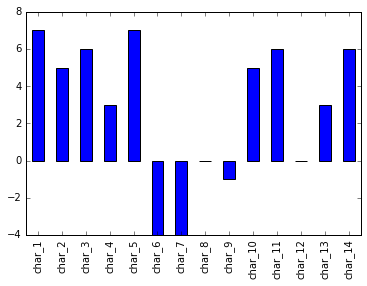

In [231]:
# lt_highschool character preference
lt_highschool_survey_char.sum().plot(kind='bar')

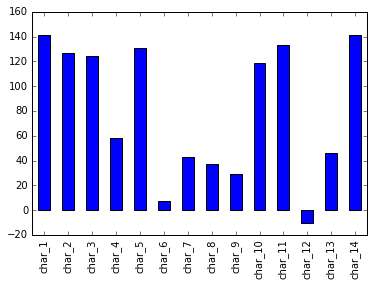

In [229]:
# highschool character preference
highschool_survey_char.sum().plot(kind='bar')

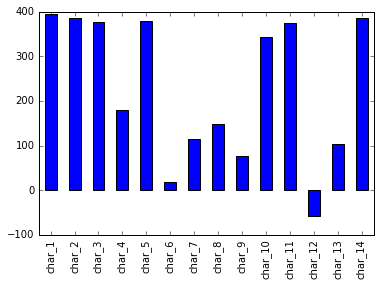

In [232]:
# associate character preference
associate_survey_char.sum().plot(kind='bar')

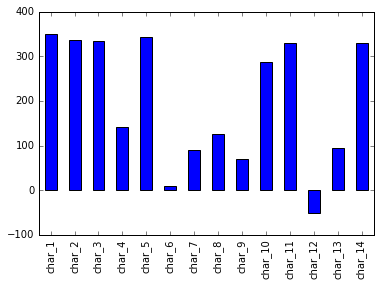

In [233]:
# bachelor character preference
bachelor_survey_char.sum().plot(kind='bar')

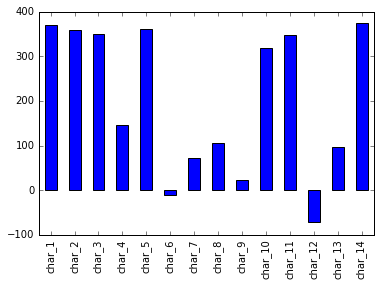

In [234]:
# graduate character preference
graduate_survey_char.sum().plot(kind='bar')